<a href="https://colab.research.google.com/github/yishengli/GraphMiningNotebooks/blob/master/Gomez_Li_Assignment5_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-igraph

     |████████████████████████████████| 3.2 MB 5.4 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.8-py3-none-any.whl size=9070 sha256=5a9597669a85f46268f2a86a90fb844b5b02cf6a8f7fffd0602f430ac4125ed3
  Stored in directory: /root/.cache/pip/wheels/15/86/ef/b8bcdfbcb1c489771ad256c7cd1eb4971cdb7f3f670938b798
Successfully built python-igraph


In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 18.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=55f35f45b1bf6b05ea8670750671829da325eb6013c08269893a3d048d56da4c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c4ccb1c1c7ae0e9d5c47a91af0dae165af3c8525253f0c800cd542ea2fd81620
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
pip install partition-igraph

In [ ]:
pip install plfit

     |████████████████████████████████| 193 kB 5.5 MB/s 
  Created wheel for plfit: filename=plfit-1.0.3-cp37-cp37m-linux_x86_64.whl size=123188 sha256=f28dcbfd9ef2fe67d07fccdf4ec7aeec6efb8169f00b920a281410ca8909fa09
  Stored in directory: /root/.cache/pip/wheels/44/c5/30/2761386f6aea1d7ca4ffb706f90535faa81365be034b32055a
Successfully built plfit


In [ ]:
pip install python-igraph leidenalg cairocffi

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=667a141b1084c9007477c29970bc909befa03365feed18d7a366dc4b47f1db7c
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [ ]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from collections import Counter
import os
import umap
import pickle
import partition_igraph
import subprocess
from sklearn.metrics import adjusted_mutual_info_score as AMI
import cairocffi
import multiprocessing as mp
from multiprocessing import cpu_count
import random

In [ ]:
!git clone https://github.com/yishengli/GraphMiningNotebooks.git

Cloning into 'GraphMiningNotebooks'...
remote: Enumerating objects: 5156, done.
remote: Counting objects: 100% (635/635), done.
remote: Compressing objects: 100% (465/465), done.
remote: Total 5156 (delta 397), reused 330 (delta 167), pack-reused 4521
Receiving objects: 100% (5156/5156), 158.77 MiB | 20.56 MiB/s, done.
Resolving deltas: 100% (785/785), done.


In [ ]:
datadir = '/content/GraphMiningNotebooks/Datasets/ABCD/'
abcd_path = '/content/GraphMiningNotebooks/ABCD_new/'
cls_edges = 'gainsboro'
cls = ['silver','dimgray','black']

# Problem 1

Reading the Karate club network

In [ ]:
## Karate club network
z = ig.Graph.Famous('zachary')
z.vs['comm'] = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]

Running ECG, Louvain, Infomap, Label Propagation, Girvan-Newman, and CNM clustering algorithms on the Karate club network. This code also computes AMI.

NOTE: Following the guidance from the chapter notebook, since the Girvan-Newman and CNM clustering algorithms produce a vertex dendogram object, a computation for all n (numbers of clusters) was generated. The one with the highest modularity was printed. 

In [ ]:
## ECG
ec = z.community_ecg()
print('ECG-AMI:', AMI(z.vs['comm'], ec.membership))
## Louvain
lo = z.community_multilevel()
print('Louvain-AMI:', AMI(z.vs['comm'], lo.membership))
## Infomap
im = z.community_infomap()
print('Infomap-AMI:', AMI(z.vs['comm'], im.membership))
## Label propagation
lp = z.community_label_propagation()
print('Label Propagation-AMI:', AMI(z.vs['comm'], lp.membership))
## Girvan-Newman
gn = z.community_edge_betweenness()
agn = []
qgn = []
for i in np.arange(z.vcount()):
    qgn.append(z.modularity(gn.as_clustering(n=i+1)))
    agn.append(AMI(z.vs['comm'],gn.as_clustering(n=i+1).membership))
## GN AMI based on the number of clusters with the highest modularity
print('##Girvan Newman-AMI based on the number of clusters with the highest modularity')
print('Girvan Newman-AMI:', agn[qgn.index(max(qgn))])
## GN modularity and AMI by number of clusters
print('Girvan Newman-Modularity by n:', qgn)
print('Girvan Newman-AMI by n:', agn)
## CNM
cn = z.community_fastgreedy()
acn = []
qcn = []
for i in np.arange(z.vcount()):
    qcn.append(z.modularity(cn.as_clustering(n=i+1)))
    acn.append(AMI(z.vs['comm'],cn.as_clustering(n=i+1).membership))
## GN AMI based on the number of clusters with the highest modularity
print('##CNM-AMI based on the number of clusters with the highest modularity')
print('CNM-AMI:', acn[qcn.index(max(qcn))])
## GN modularity and AMI by number of clusters
print('CNM-Modularity by n:', qcn)
print('CNM-AMI by n:', acn)
##print('CNM-AMI:', AMI(z.vs['comm'], cn.membership))

ECG-AMI: 0.47849787736349625
Louvain-AMI: 0.5805154226518419
Infomap-AMI: 0.687422347904921
Label Propagation-AMI: 1.0
##Girvan Newman-AMI based on the number of clusters with the highest modularity
Girvan Newman-AMI: 0.5499173029289168
Girvan Newman-Modularity by n: [0.0, 0.3599605522682446, 0.34878369493754113, 0.36324786324786335, 0.40129848783694944, 0.3925049309664695, 0.3762327416173571, 0.35831689677843526, 0.341715976331361, 0.32478632478632485, 0.31591058514135445, 0.2986522024983565, 0.2804076265614727, 0.26282051282051283, 0.24753451676528593, 0.22682445759368833, 0.20890861275476655, 0.18984220907297827, 0.18129520052596967, 0.16009204470742933, 0.14694280078895464, 0.12031558185404344, 0.1081525312294543, 0.09064760026298486, 0.08029257067718604, 0.06993754109138725, 0.057856673241288646, 0.03418803418803419, 0.022024983563445122, -0.0028763971071663215, -0.026298487836949356, -0.03763971071663377, -0.05374753451676527, -0.04980276134122286]
Girvan Newman-AMI by n: [6.4228

# Problem 2

In [ ]:
## Function to compare AMI between clustering algorithm results
def ami2(alg):
    ami = pd.DataFrame(index = alg, columns = alg)
    for i in alg:
        for j in alg:
            if i == j:
                ami.xs(i)[j] = 'N/A'
            else:
                ami.xs(i)[j] = eval(('AMI('+i+'.membership, '+j+'.membership)'))
    return ami

Code to read and simplify the GitHub original, ML and web developers graphs/subgraphs:

In [ ]:
musae_git_target_url = 'https://raw.githubusercontent.com/ftheberge/GraphMiningNotebooks/master/Datasets/GitHubDevelopers/musae_git_target.csv'
musae_git_edges_url = 'https://raw.githubusercontent.com/ftheberge/GraphMiningNotebooks/master/Datasets/GitHubDevelopers/musae_git_edges.csv'

In [ ]:
## read the GitHub edge list as tuples and build undirected graph
D = pd.read_csv(musae_git_edges_url)
tuples = [tuple(x) for x in D.values]
gh = ig.Graph.TupleList(tuples, directed = False)

## add some node features, here there are two class of nodes
## 0: web developer (red), 1: ml developer (blue)
X = pd.read_csv(musae_git_target_url)
idx = [int(i) for i in gh.vs['name']]
sorterIndex = dict(zip(idx,range(len(idx))))
X['Rank'] = X['id'].map(sorterIndex)
X.sort_values(['Rank'], ascending=[True],inplace=True)
X.dropna(inplace=True)
#gh.vs['target'] = list(X['ml_target'])
cls = ['grey','black'] ## node colors
lbl = ['web','ml']     ## node labels
gh.vs['color'] = [cls[i] for i in list(X['ml_target'])]
gh.vs['lbl'] = [lbl[i] for i in list(X['ml_target'])]
gh.es['color'] = 'grey' ## edge color

## build the subgraphs
gh_ml = gh.subgraph([v for v in gh.vs() if v['lbl']=='ml'])
gh_web = gh.subgraph([v for v in gh.vs() if v['lbl']=='web'])

## there are 9739 ml developers and 27961 web developers
print('GitHub nodes:',gh.vcount(),'; ml developers:',gh_ml.vcount(),'; web developers:',gh_web.vcount())

GitHub nodes: 37700 ; ml developers: 9739 ; web developers: 27961


In [ ]:
## Simplify graphs
gh = gh.subgraph([v for v in gh.vs() if v.degree()>0])
gh_ml = gh_ml.subgraph([v for v in gh_ml.vs() if v.degree()>0])
gh_web = gh_web.subgraph([v for v in gh_web.vs() if v.degree()>0])
gh = gh.simplify(multiple=False)
gh_ml = gh_ml.simplify(multiple=False)
gh_web = gh_web.simplify(multiple=False)

## there are 9739 ml developers and 27961 web developers
print('GitHub nodes:',gh.vcount(),'; ml developers:',gh_ml.vcount(),'; web developers:',gh_web.vcount())

GitHub nodes: 37700 ; ml developers: 7431 ; web developers: 27676


Given the size of the graph, as well as the igraph bug documented in https://github.com/igraph/igraph/issues/675, only the ECG, Louvain, Infomap and Label propagation clustering algorithms will be run for the entire GitHub ML developers graph. 

NOTE: The error is related with the Dendogram having less steps than the number of nodes.

In [ ]:
## ECG
ec = gh_ml.community_ecg()
## Louvain
lo = gh_ml.community_multilevel()
## Infomap
im = gh_ml.community_infomap()
## Label propagation
lp = gh_ml.community_label_propagation()

In [ ]:
alg = ['ec', 'lo', 'im', 'lp']
ami = ami2(alg)
print(ami)

          ec        lo        im        lp
ec       N/A  0.511498  0.552878   0.21898
lo  0.511498       N/A  0.458378  0.277152
im  0.552878  0.458378       N/A  0.129786
lp   0.21898  0.277152  0.129786       N/A


According to the resuls above, the two algorithms with the most similar results are ECG and Infomap.

Now, in order to be able to really run the Girvan-Newman while still creating a complete Dendogram, we induce the sugbraph using the giant component (cluster with the maximum number of nodes). That way, we no longer reproduce the error mentioned above.

However, we tried running the appropriate command with the entire GitHub ML graph, and it crashed after 6h 32, 23s. For this reason, we will induce a smaller subgraph using the code below to randomly select the nodes to keep.

In [ ]:
p = 0.5
to_keep = [n for n in gh_ml.vs() if (round(random.random(), ndigits = 1) < p)]

gs = gh_ml.subgraph(to_keep)
gs = gs.subgraph([v for v in gs.vs() if v.degree()>0])
gs = gs.simplify(multiple=False)

print(f"{gs.vcount()} nodes and {gs.ecount()} directed edges")

2349 nodes and 3767 directed edges


The below code creates a function that only keeps nodes that are weakly connected in the biggest of the clusters of the graph.

In [ ]:
## Function to delete vertixes and make graph weakly connected
def weak_con(g):
    cl = g.clusters(mode='WEAK')
    s = [len(sx) for sx in cl]
    m = g.clusters(mode='WEAK').membership
    index = s.index(max(s))
    nodes = [g.vs[i].index for i in range(g.vcount()) if m[i] != index]
    g.delete_vertices(nodes)
    
    return g

In [ ]:
gs = weak_con(gs)
print(f"{gs.vcount()} nodes and {gs.ecount()} directed edges")

2013 nodes and 3570 directed edges


In [ ]:
## ECG
ecs = gs.community_ecg()
## Louvain
los = gs.community_multilevel()
## Infomap
ims = gs.community_infomap()
## Label propagation
lps = gs.community_label_propagation()

In [ ]:
result = gs.community_edge_betweenness()
print(result)

Dendrogram, 2013 elements, 2012 merges


In [ ]:
qgs = [gs.modularity(result.as_clustering(n=i+1)) for i in np.arange(gs.vcount())]
gns = result.as_clustering(n = qgs.index(max(qgs)))
algs = ['ecs', 'los', 'ims', 'lps', 'gns']
amis = ami2(algs)
print(amis)

          ecs       los       ims       lps       gns
ecs       N/A  0.643378  0.646217  0.428631  0.599317
los  0.643378       N/A   0.57792   0.42279  0.592075
ims  0.646217   0.57792       N/A  0.391527  0.601533
lps  0.428631   0.42279  0.391527       N/A  0.494966
gns  0.599317  0.592075  0.601533  0.494966       N/A


#Problem 5

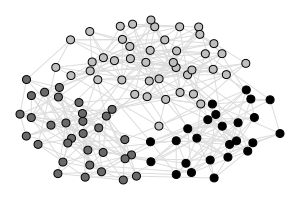

In [ ]:
g = ig.Graph.Read_Ncol(datadir+'abcd_100.dat',directed=False)
c = np.loadtxt(datadir+'abcd_100_comms.dat',dtype='uint16',usecols=(1))
g.vs['comm'] = [c[int(x['name'])-1]-1 for x in g.vs]
gt = {k:(v-1) for k,v in enumerate(g.vs['comm'])}
n2k = {int(v):k for k,v in enumerate(g.vs['name'])}
g.vs['size'] = 8
g.es['color'] = cls_edges
g.vs['color'] = [cls[i] for i in g.vs['comm']]
ig.plot(g, bbox=(0,0,300,200))

In [ ]:
in_deg_0 = g.subgraph_edges([e for e in g.es if g.vs['comm'][e.tuple[0]]==0 and g.vs['comm'][e.tuple[1]]==0],
                            delete_vertices=False).degree()
in_deg_1 = g.subgraph_edges([e for e in g.es if g.vs['comm'][e.tuple[0]]==1 and g.vs['comm'][e.tuple[1]]==1],
                            delete_vertices=False).degree()
in_deg_2 = g.subgraph_edges([e for e in g.es if g.vs['comm'][e.tuple[0]]==2 and g.vs['comm'][e.tuple[1]]==2],
                            delete_vertices=False).degree()

g.vs['in_deg'] = [in_deg_0[i] + in_deg_1[i] for i in range(g.vcount())]
mu = [np.mean(in_deg_0),np.mean(in_deg_1),np.mean(in_deg_2)]
sig = [np.std(in_deg_0),np.std(in_deg_1),np.std(in_deg_2)]
g.vs['z'] = [(v['in_deg']-mu[v['comm']])/sig[v['comm']] for v in g.vs]

g.vs['deg'] = g.degree()
g.vs['out_deg'] = [v['deg'] - v['in_deg'] for v in g.vs]
g.vs['p'] = [1-(v['in_deg']/v['deg'])**2-(v['out_deg']/v['deg'])**2 for v in g.vs]
D = pd.DataFrame(np.array([g.vs['z'],g.vs['p']]).transpose(),columns=['z','p']).sort_values(by='z',ascending=False)
D.head(10)

,z,p
2,2.879925,0.277778
31,2.879925,0.165289
32,2.527856,0.180000
24,2.521735,0.260355
37,2.220092,0.000000
22,2.220092,0.355030
48,2.220092,0.165289
9,2.175787,0.197531
33,2.175787,0.197531
14,2.175787,0.197531


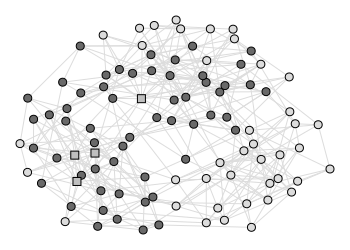

In [ ]:
g.vs['color'] = 'black'
g.vs['shape'] = 'circle'
for v in g.vs:
    if v['z']<2.5: 
        if v['p'] < .62 and v['p'] >= .05: 
            v['color'] = 'dimgrey'
        if v['p'] < .05: 
            v['color'] = 'gainsboro'
    if v['z']>=2.5 and v['p'] < .3:          
        v['color'] = 'silver'
        v['shape'] = 'square'

ig.plot(g, bbox=(0,0,350,250))

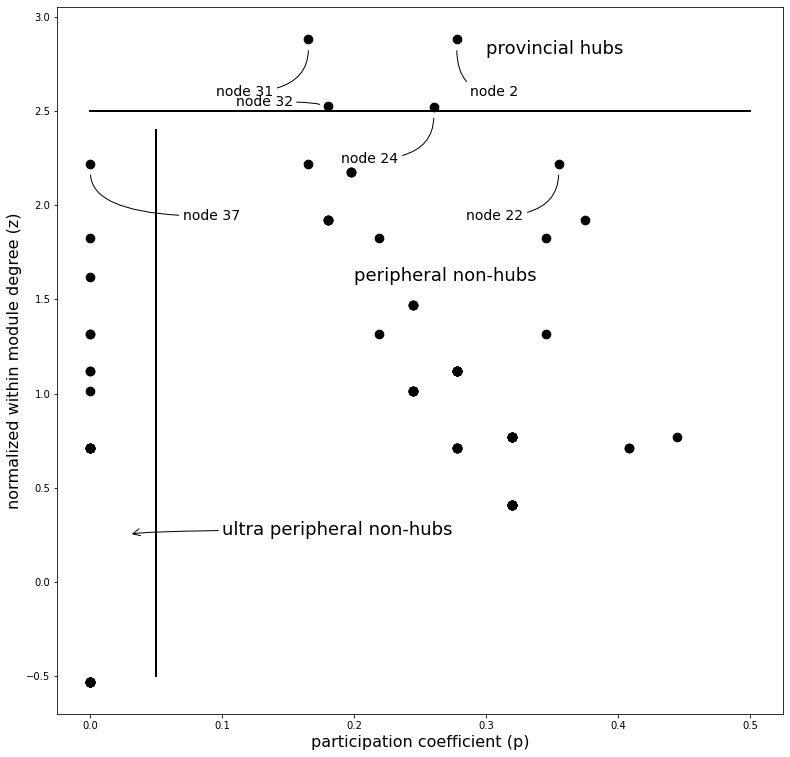

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))
ax.scatter(g.vs['p'],g.vs['z'],marker='o',s=75, color='k')

plt.plot([0, .5], [2.5, 2.5], color='k', linestyle='-', linewidth=2)
plt.plot([.05, .05], [-.5, 2.4], color='k', linestyle='-', linewidth=2)

ax.annotate('node 2', (g.vs['p'][2],g.vs['z'][2]-.05), xytext=(g.vs['p'][2]+.01,g.vs['z'][2]-.3), 
            fontsize=14,
            arrowprops = dict(arrowstyle="-",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('node 31', (g.vs['p'][31],g.vs['z'][31]-.05), xytext=(g.vs['p'][31]-.07,g.vs['z'][31]-.3), 
            fontsize=14,
            arrowprops = dict(arrowstyle="-",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('node 32', (g.vs['p'][32]-.005,g.vs['z'][32]), xytext=(g.vs['p'][32]-.07,g.vs['z'][32]), 
            fontsize=14,
            arrowprops = dict(arrowstyle="-",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('node 24', (g.vs['p'][24],g.vs['z'][24]-.05), xytext=(g.vs['p'][24]-.07,g.vs['z'][24]-.3), 
            fontsize=14,
            arrowprops = dict(arrowstyle="-",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('node 37', (g.vs['p'][37],g.vs['z'][37]-.05), xytext=(g.vs['p'][37]+.07,g.vs['z'][37]-.3), 
            fontsize=14,
            arrowprops = dict(arrowstyle="-",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('node 22', (g.vs['p'][22],g.vs['z'][22]-.05), xytext=(g.vs['p'][22]-.07,g.vs['z'][22]-.3), 
            fontsize=14,
            arrowprops = dict(arrowstyle="-",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('provincial hubs',(.3,2.8), fontsize=18)
ax.annotate('peripheral non-hubs',(.2,1.6), fontsize=18)
ax.annotate('ultra peripheral non-hubs',(.03,0.25),xytext=(.1,0.25), fontsize=18,
             arrowprops = dict( arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

plt.xlabel('participation coefficient (p)',fontsize=16)
plt.ylabel('normalized within module degree (z)',fontsize=16);

#Problem 6

In [ ]:
import timeit
import numpy as np
from timeit import Timer

def test_ECG():
    g_ecg = g.community_ecg().membership

def test_Louvain():
    g_louvain = g.community_multilevel().membership

def test_Infomap():
    g_infomap = g.community_infomap().membership
    
def test_Propagation():
    g_label = g.community_label_propagation().membership

def test_CNM():
    g_cnm = g.community_fastgreedy().as_clustering().membership

def test_Girvan_Newman():
    g_newman = g.community_edge_betweenness()
    
def compare_time(dir, net_file, comm_file, expSize = 1):
    g = ig.Graph.Read_Ncol(dir+net_file,directed=False)
    c = np.loadtxt(dir+comm_file,dtype='uint16',usecols=(1))
    g.vs['comm'] = [c[int(x['name'])-1] for x in g.vs]

    t1 = Timer("test_ECG()", "from __main__ import test_ECG")
    st1 = t1.timeit(number=expSize)
    print("ECG",st1, "milliseconds")
    t2 = Timer("test_Louvain()", "from __main__ import test_Louvain")
    print("Louvain",t2.timeit(number=expSize), "milliseconds")
    t3 = Timer("test_Infomap()", "from __main__ import test_Infomap")
    print("Infomap",t3.timeit(number=expSize), "milliseconds")
    t4 = Timer("test_Propagation()", "from __main__ import test_Propagation")
    print("Propagation",t4.timeit(number=expSize), "milliseconds")
    t5 = Timer("test_CNM()", "from __main__ import test_CNM")
    print("CNM",t5.timeit(number=expSize), "milliseconds")
    t6 = Timer("test_Girvan_Newman()", "from __main__ import test_Girvan_Newman")
    st6 = t6.timeit(number=expSize)
    print("Girvan_Newman",st6, "milliseconds")

n = 100

In [ ]:
compare_time(datadir, 'abcd_100.dat', 'abcd_100_comms.dat')

ECG 0.013823484998283675 milliseconds
Louvain 0.0005743820001953281 milliseconds
Infomap 0.017789059998904122 milliseconds
Propagation 0.0002568870004324708 milliseconds
CNM 0.0003546530024323147 milliseconds
Girvan_Newman 0.1433143559988821 milliseconds


n = 400

In [ ]:
compare_time(abcd_path, 'net_400.dat', 'comm_400.dat')

ECG 0.05841882400000031 milliseconds
Louvain 0.0016061270002865058 milliseconds
Infomap 0.07479626099984671 milliseconds
Propagation 0.0007976249999046559 milliseconds
CNM 0.0016932869998527167 milliseconds
Girvan_Newman 2.4799255420002737 milliseconds


n = 800

In [ ]:
compare_time(abcd_path, 'net_800.dat', 'comm_800.dat')

ECG 0.12701396299962653 milliseconds
Louvain 0.0030120139999780804 milliseconds
Infomap 0.18243069099980858 milliseconds
Propagation 0.0011830860003101407 milliseconds
CNM 0.006539378000070428 milliseconds
Girvan_Newman 60.10059149100016 milliseconds


n = 1000

In [ ]:
compare_time(datadir, 'abcd_1000.dat', 'abcd_1000_comms.dat')

ECG 0.41985120900017137 milliseconds
Louvain 0.01788783699976193 milliseconds
Infomap 1.1826771430000917 milliseconds
Propagation 0.0016443780000372499 milliseconds
CNM 0.028673109999999724 milliseconds
Girvan_Newman 1322.3239754340002 milliseconds


n = 1600

Note: The run time when n=1600 is unusually short. We acknowledge that our choice of parameters might not be very appropriate. 

In [ ]:
compare_time(abcd_path, 'net_1600.dat', 'comm_1600.dat')

ECG 0.015638984004908707 milliseconds
Louvain 0.0005678489978890866 milliseconds
Infomap 0.020496457000263035 milliseconds
Propagation 0.000197197005036287 milliseconds
CNM 0.0005862020043423399 milliseconds
Girvan_Newman 0.14737850999517832 milliseconds
